# TestCase 1

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from create_jsonfile import ask_user,read_config,check_config

# ask_user()
config = read_config(configfile="configs/config1.json")

### Configuration has been read from config.json ###
# dimension : 2
# testcase : 1
# version : 1
# error_estimations : {'param_num': 1}
# gains : {'n_params': 50}


In [3]:
dimension = config["dimension"]
testcase = config["testcase"]
version = config["version"]   
# high_degree = 10

In [4]:
assert testcase == 1
check_config(config)

Config file is valid


## Imports + Load network

In [5]:
# export CUDA_VISIBLE_DEVICES=
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [6]:
from testcases.utils import create_tree

import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
current_dir = os.getcwd()
repo_dir = os.path.dirname(current_dir)
repo_dir = os.path.dirname(repo_dir)
# vérifier que repo_dir finit bien par "code" (à modifier pour l'utilisateur)
assert repo_dir.split("/")[-1] == "code"

In [8]:
if version == 1:
    from testcases.networks.test_2D.test_1.test_1_v1 import Run_laplacian2D,Poisson_2D
elif version == 2:
    from testcases.networks.test_2D.test_1.test_1_v2 import Run_laplacian2D,Poisson_2D
else:
    raise ValueError("Version not found")
from testcases.problem.problem_2D import TestCase1
problem = TestCase1(version=version)

Using device: cpu
/home/u2/lecourtier/Article1/code
torch loaded; device is cpu


/home/u2/lecourtier/Article1/code
>> load network /home/u2/lecourtier/Article1/code/networks/test_2D/test_fe1.pth
network loaded
Error  tensor([0.0043])


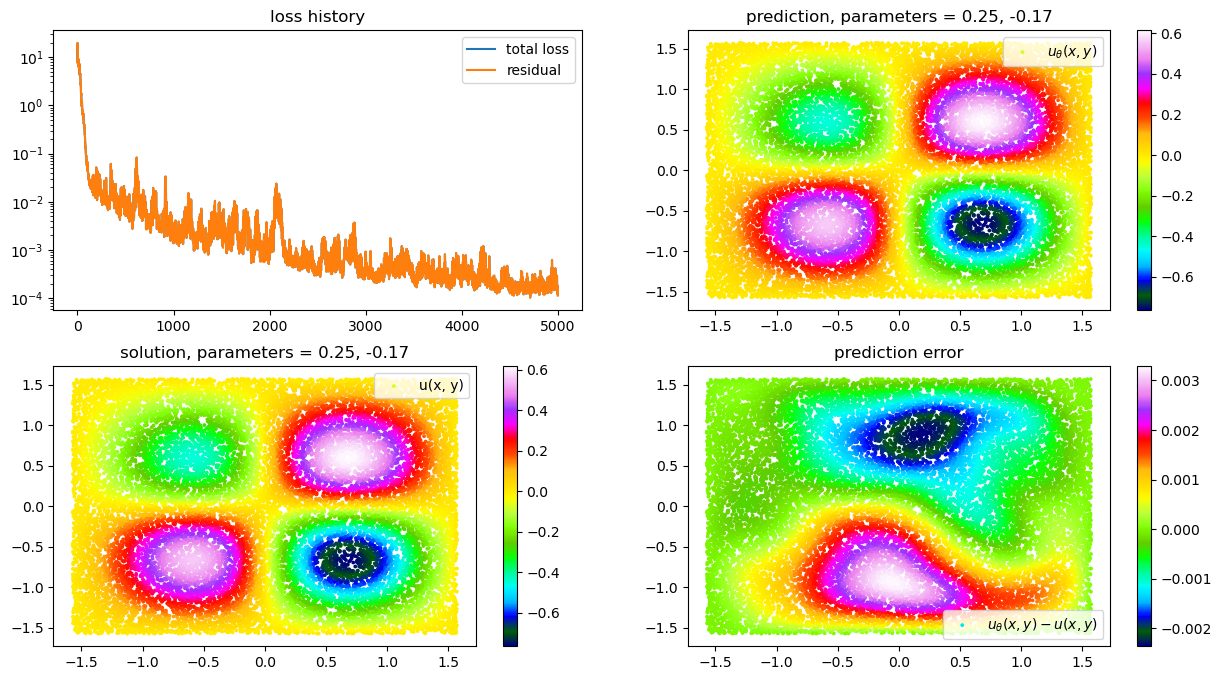

In [9]:
pde = Poisson_2D()
trainer,u_theta = Run_laplacian2D(pde)

## Error estimations

### Imports

In [10]:
from modfenics.error_estimations.error_estimations import ErrorEstimations
from modfenics.error_estimations.compare import CompareMethods

/home/u2/lecourtier/miniconda3/envs/fenics_scimba_modules/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [11]:
param_num = config["error_estimations"]["param_num"]     
error_estimations = ErrorEstimations(param_num, problem, repo_dir = repo_dir)
compare_methods = CompareMethods(error_estimations)
tab_nb_vert = error_estimations.tab_nb_vert

## Results directory: /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version1/cvg/param1/


### Run FEM

In [12]:
degree = 1
df_FEM, tab_h_FEM, tab_err_FEM = error_estimations.run_fem_deg(degree,new_run=False)

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version1/cvg/param1/FEM_case1_v1_param1_degree1.csv


## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version1/cvg/param1/FEM_case1_v1_param1_degree1.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version1/cvg/param1/FEM_case1_v1_param1_degree2.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version1/cvg/param1/FEM_case1_v1_param1_degree3.csv


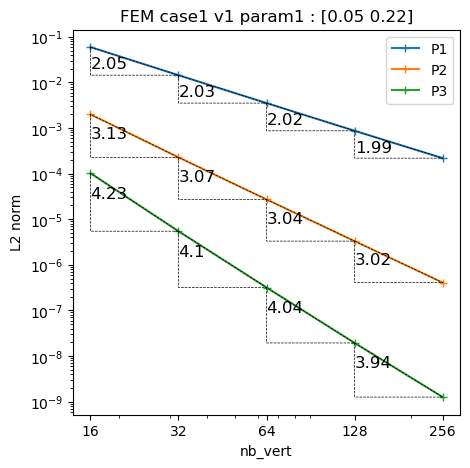

In [13]:
error_estimations.run_fem_alldeg(new_run=False,plot_cvg=True)

### Run Add

In [14]:
degree = 1
df_Corr, tab_h_Corr, tab_err_Corr = error_estimations.run_corr_deg(degree,u_theta,new_run=False)

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version1/cvg/param1/Corr_case1_v1_param1_degree1.csv


## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version1/cvg/param1/Corr_case1_v1_param1_degree1.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version1/cvg/param1/Corr_case1_v1_param1_degree2.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version1/cvg/param1/Corr_case1_v1_param1_degree3.csv


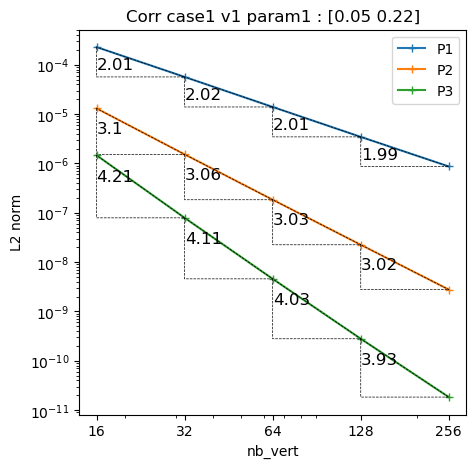

In [15]:
error_estimations.run_corr_alldeg(u_theta,new_run=False,plot_cvg=True)

### Save results

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version1/cvg/param1/FEM_case1_v1_param1_degree1.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version1/cvg/param1/FEM_case1_v1_param1_degree2.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version1/cvg/param1/FEM_case1_v1_param1_degree3.csv


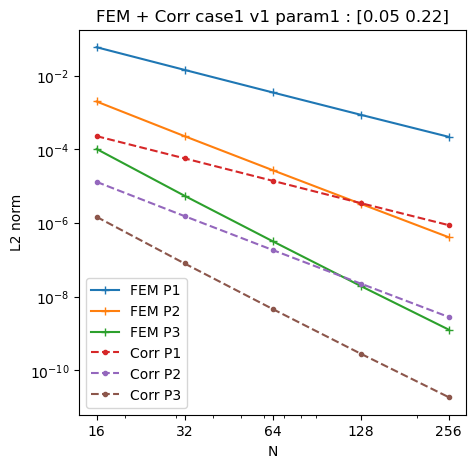

In [16]:
compare_methods.plot_Corr_vs_FEM_alldeg()

In [17]:
compare_methods.save_tab_alldeg_allM()

/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:189: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[error_cols] = df[error_cols].applymap(lambda x: f'{x:.2e}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:193: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[factor_cols] = df[factor_cols].applymap(lambda x: f'{round(x,2)}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:189: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[error_cols] = df[error_cols].applymap(lambda x: f'{x:.2e}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:193: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[factor_cols] = df[factor_cols].applymap(lambda x: f'{round(x,2)}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/comp

## Gains

### Imports

In [18]:
from modfenics.gains.gains import GainsEnhancedFEM
from modfenics.gains.compare import CompareGainsMethods

In [19]:
n_params = config["gains"]["n_params"]   
gains_enhanced_fem = GainsEnhancedFEM(n_params, problem, repo_dir = repo_dir)
compare_gains_methods = CompareGainsMethods(gains_enhanced_fem)

## Results directory: /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version1/gains/


### Run FEM

In [20]:
degree = 1
df_FEM, tab_h_FEM, tab_err_FEM = gains_enhanced_fem.run_fem_deg(degree,new_run=False)

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version1/gains/FEM_errors_case1_v1_degree1.csv


In [21]:
gains_enhanced_fem.run_fem_alldeg(new_run=False)

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version1/gains/FEM_errors_case1_v1_degree1.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version1/gains/FEM_errors_case1_v1_degree2.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version1/gains/FEM_errors_case1_v1_degree3.csv


### Run PINNs

In [22]:
degree = 1
df_PINNs, tab_h_PINNs, tab_err_PINNs = gains_enhanced_fem.run_pinns_deg(degree,u_theta,new_run=False)

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version1/gains/PINNs_errors_case1_v1_degree1.csv


In [23]:
gains_enhanced_fem.run_pinns_alldeg(u_theta,new_run=False)

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version1/gains/PINNs_errors_case1_v1_degree1.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version1/gains/PINNs_errors_case1_v1_degree2.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version1/gains/PINNs_errors_case1_v1_degree3.csv


### Run Add

In [24]:
degree = 1
df_Corr, tab_h_Corr, tab_err_Corr = gains_enhanced_fem.run_corr_deg(degree,u_theta,new_run=False)

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version1/gains/Corr_errors_case1_v1_degree1.csv


In [25]:
gains_enhanced_fem.run_corr_alldeg(u_theta,new_run=False)

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version1/gains/Corr_errors_case1_v1_degree1.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version1/gains/Corr_errors_case1_v1_degree2.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version1/gains/Corr_errors_case1_v1_degree3.csv


### Compare methods

In [26]:
degree = 1
# df_errors = compare_gains_methods.create_dferrors_deg_allM(degree)
df_gains = compare_gains_methods.create_dataframes_deg_allM(degree)

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version1/gains/FEM_errors_case1_v1_degree1.csv


In [27]:
compare_gains_methods.create_dataframes_alldeg_allM()

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version1/gains/FEM_errors_case1_v1_degree1.csv


/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version1/gains/FEM_errors_case1_v1_degree2.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version1/gains/FEM_errors_case1_v1_degree3.csv


In [28]:
df_stats = compare_gains_methods.save_stats_deg_allM(degree)

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version1/gains/FEM_errors_case1_v1_degree1.csv
method         PINNs                            FEM                       
type             min     max    mean    std     min     max    mean    std
method n_vert                                                             
Corr   20      15.69   48.33   33.62   5.56  134.32  377.36  269.39  43.66
       40      61.40  195.53  135.25  23.18  131.20  362.12  262.13  41.68


/home/u2/lecourtier/Article1/code/src/modfenics/gains/compare.py:251: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_stats_round = df_stats.applymap(lambda x: f"{x:.2f}")


In [29]:
compare_gains_methods.save_stats_alldeg_allM()

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version1/gains/FEM_errors_case1_v1_degree1.csv
method         PINNs                            FEM                       
type             min     max    mean    std     min     max    mean    std
method n_vert                                                             
Corr   20      15.69   48.33   33.62   5.56  134.32  377.36  269.39  43.66
       40      61.40  195.53  135.25  23.18  131.20  362.12  262.13  41.68


/home/u2/lecourtier/Article1/code/src/modfenics/gains/compare.py:251: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_stats_round = df_stats.applymap(lambda x: f"{x:.2f}")


/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version1/gains/FEM_errors_case1_v1_degree2.csv
method           PINNs                               FEM                  \
type               min      max     mean      std    min     max    mean   
method n_vert                                                              
Corr   20       244.05   993.21   653.07   153.16  67.02  164.65  134.85   
       40      2055.16  8340.94  5501.88  1286.49  66.45  159.48  131.86   

method                
type             std  
method n_vert         
Corr   20      21.29  
       40      20.34  


/home/u2/lecourtier/Article1/code/src/modfenics/gains/compare.py:251: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_stats_round = df_stats.applymap(lambda x: f"{x:.2f}")


/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase1/version1/gains/FEM_errors_case1_v1_degree3.csv
method            PINNs                                    FEM                \
type                min        max       mean       std    min    max   mean   
method n_vert                                                                  
Corr   20       2780.52   11705.79    7542.95   1766.24  39.52  72.65  61.55   
       40      50649.24  211156.91  136714.04  31882.69  39.83  72.62  61.67   

method               
type            std  
method n_vert        
Corr   20      7.02  
       40      6.87  


/home/u2/lecourtier/Article1/code/src/modfenics/gains/compare.py:251: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_stats_round = df_stats.applymap(lambda x: f"{x:.2f}")
